In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as flm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
#filename = '/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science/Week03/'
filename = '/Users/gillanes/Documents/coding_dojo/data/bike_collisions.csv'
df = pd.read_csv(filename)
df.head()

,accident_index,date,borough,ward,latitude,longitude,casualties,severity,url,api_url,number_of_casualties,number_of_vehicles,location
0,2019010161545,2019-02-04T19:55:00,Hounslow,Heston Central,51.475300,-0.375342,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,POINT(-0.375342 51.4753)
1,2019010191515,2019-07-04T15:09:00,Lambeth,Clapham Town,51.468211,-0.144234,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,POINT(-0.144234 51.468211)
2,2019010209381,2019-10-03T17:05:00,Hillingdon,Northwood,51.612605,-0.434904,"Pedestrian,Cyclist",fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,2,1,POINT(-0.434904 51.612605)
3,2019010214996,2019-10-30T06:39:00,Lewisham,Rushey Green,51.444015,-0.026135,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2,POINT(-0.026135 51.444015)
4,2019010254652,2019-02-09T08:40:00,Camden,West Hampstead,51.550844,-0.191400,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,1,POINT(-0.1914 51.550844)


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61046 entries, 0 to 61045
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accident_index        61046 non-null  object 
 1   date                  61046 non-null  object 
 2   borough               61046 non-null  object 
 3   ward                  61046 non-null  object 
 4   latitude              61046 non-null  float64
 5   longitude             61046 non-null  float64
 6   casualties            61046 non-null  object 
 7   severity              61046 non-null  object 
 8   url                   61046 non-null  object 
 9   api_url               61046 non-null  object 
 10  number_of_casualties  61046 non-null  int64  
 11  number_of_vehicles    61046 non-null  int64  
 12  location              61046 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.1+ MB


In [5]:
# Tranformamos la columna date de object a datetime
df['date'] = pd.to_datetime(df['date'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61046 entries, 0 to 61045
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   accident_index        61046 non-null  object        
 1   date                  61046 non-null  datetime64[ns]
 2   borough               61046 non-null  object        
 3   ward                  61046 non-null  object        
 4   latitude              61046 non-null  float64       
 5   longitude             61046 non-null  float64       
 6   casualties            61046 non-null  object        
 7   severity              61046 non-null  object        
 8   url                   61046 non-null  object        
 9   api_url               61046 non-null  object        
 10  number_of_casualties  61046 non-null  int64         
 11  number_of_vehicles    61046 non-null  int64         
 12  location              61046 non-null  object        
dtypes: datetime64[ns

In [120]:
# Obtenemos las columnas de Años, Meses y Dias
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

In [83]:
df['severity'].value_counts()

slight     53050
serious     7792
fatal        204
Name: severity, dtype: int64

In [35]:
df2 = df.groupby(['year'])['year'].count() # Eventos por año

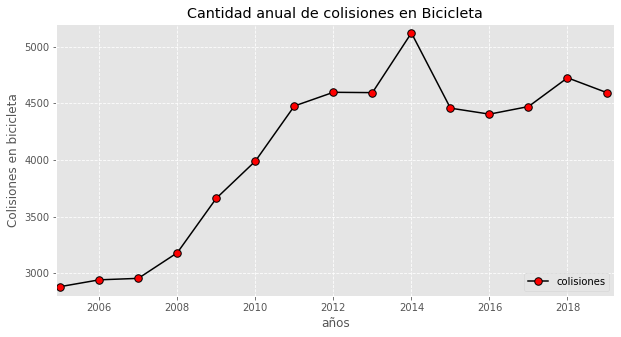

In [230]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(df2.index, df2.values, label='colisiones', c='black', marker='.', markerfacecolor='red', markersize=15)
plt.axis([2004.9, 2019.2, 2800, 5200])
plt.xlabel('años')
plt.ylabel('Colisiones en bicicleta')
plt.title('Cantidad anual de colisiones en Bicicleta')
plt.legend(loc=4);
plt.grid(alpha=1, linestyle='--')

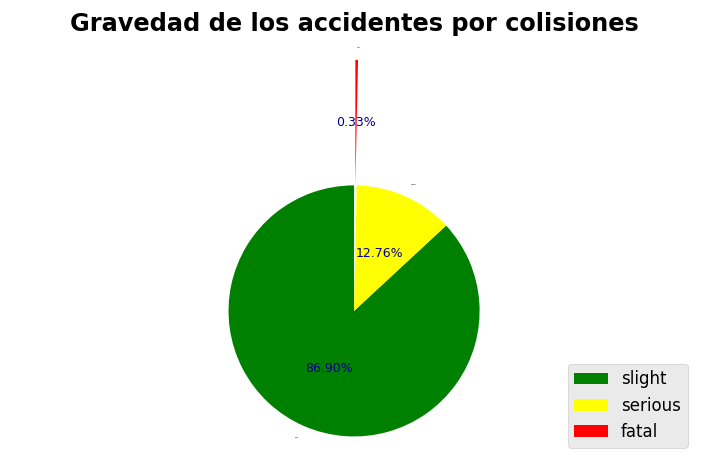

In [231]:
size = df['severity'].value_counts().values
etiquetas = df['severity'].value_counts().index
explotar = [0,0,1]
colores = ['green', 'yellow', 'red']

fig1 = plt.figure(dpi=120, facecolor='white')

ax = fig1.add_subplot(1,1,1) 
plt.title('Gravedad de los accidentes por colisiones', fontweight='bold')
patches, texts, autotexts = ax.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = False, startangle=90, pctdistance=0.5, colors=colores)
for text in texts:
    text.set_size(0)
for autotext in autotexts:
    autotext.set_size(7.5)
    autotext.set_color('darkblue')
ax.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)
ax.legend(loc=4)
plt.tight_layout()
plt.show()

In [187]:
muertes = df.groupby(['year'])['number_of_casualties'].sum()

In [182]:
muertes.max()

5311

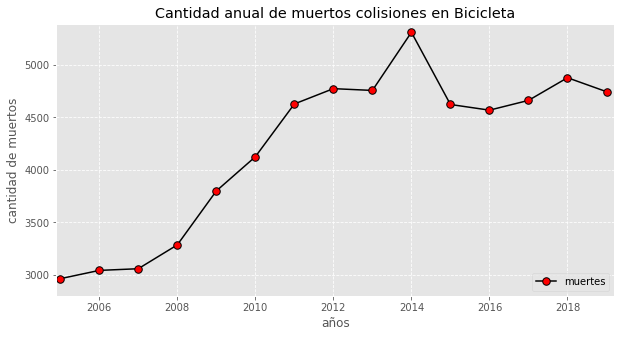

In [233]:
# Cantidad de Muertes anuales por Colisiones en Bicicleta en Londres
plt.figure(figsize=(10,5))
plt.plot(muertes.index, muertes.values, label='muertes', c='black', marker='.', markerfacecolor='red', markersize=15)
plt.axis([2004.9, 2019.2, 2800, 5390])
plt.xlabel('años')
plt.ylabel('cantidad de muertos')
plt.title('Cantidad anual de muertos colisiones en Bicicleta')
plt.legend(loc=4);
plt.grid(alpha=1, linestyle='--')

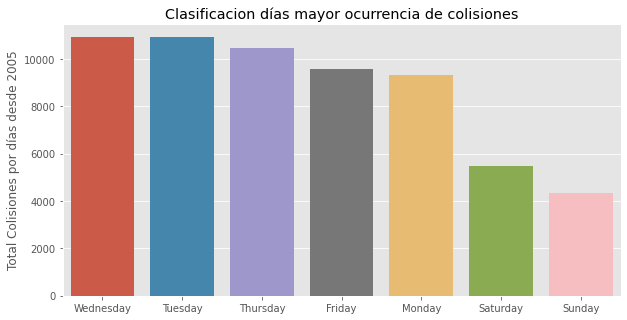

In [234]:
# Días donde ocurren mayor cantidad de Colisiones
dias = df['day'].value_counts()
plt.figure(figsize=(10,5))
plt.title('Clasificacion días mayor ocurrencia de colisiones')
sns.barplot(x = dias.index, y = dias.values);
plt.ylabel('Total Colisiones por días desde 2005');

In [211]:
localizacion = []
for i in range(len(df)):
    localizacion.append(str(df.loc[i, 'latitude']) + ' ' + str(df.loc[i, 'longitude']))
df['geo'] = localizacion

In [275]:
x = df['geo'].value_counts().head()

In [290]:
latitude=[]
longitude=[]
for i in x.index:
    latitude.append(float(i[0:9]))
    longitude.append(float(i[10:19]))

In [297]:
# Top 5 en lugares colisiones
m = flm.Map(location=[51.509865, -0.118092], zoom_start=10) # Mapa con coordenadas de Londres

flm.Marker(
    location=[latitude[0], longitude[0]],
    popup="Top #1",
    icon=flm.Icon(color="red", icon="info-sign"),
).add_to(m)

flm.Marker(
    location=[latitude[1], longitude[1]],
    popup="Top #2",
    icon=flm.Icon(color="red", icon="info-sign"),
).add_to(m)

flm.Marker(
    location=[latitude[2], longitude[2]],
    popup="Top #3",
    icon=flm.Icon(color="red", icon="info-sign"),
).add_to(m)

flm.Marker(
    location=[latitude[3], longitude[3]],
    popup="Top #4",
    icon=flm.Icon(color="red", icon="info-sign"),
).add_to(m)

flm.Marker(
    location=[latitude[4], longitude[4]],
    popup="Top #5",
    icon=flm.Icon(color="red", icon="info-sign"),
).add_to(m)

m

In [238]:
for i in x:
    

'51.497086 -0.099368'